<a href="https://colab.research.google.com/github/estrella-mooney/ma-learning-python/blob/main/Wine_DIY_with_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QRC Live walkthrough

Walkthrough of the [wine dataset](https://archive.ics.uci.edu/ml/datasets/wine)

Goal: Identify which wines are which Vineyards

Steps we should take to solve this problem:

1. Open the data
1. See which features and labels are available
1. Check the data quality
1. Make sure our features and labels are encoded properly
1. Create training and test sets
1. Choose a model
1. Build and train the model
1. Check performance
1. Modify our model choice if needed
1. Repeat until satisfied


## Step 1a: Download the dataset



In [55]:
# Download the dataset

!wget https://raw.githubusercontent.com/TomReidNZ/QRC_Datasets/main/wine.csv



--2023-09-18 21:23:21--  https://raw.githubusercontent.com/TomReidNZ/QRC_Datasets/main/wine.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10960 (11K) [text/plain]
Saving to: ‘wine.csv.2’

wine.csv.2          100%[===================>]  10.70K  --.-KB/s    in 0s      

2023-09-18 21:23:21 (64.5 MB/s) - ‘wine.csv.2’ saved [10960/10960]



In [56]:
import numpy as np
def predict_proba_with_threshold(predicted_probabilities,threshold=0.5):
    """
    Predict class probabilities and apply a custom threshold to classify instances.

    Parameters:
    - predicted_probabilities: A scikit-learn classifier with a predict_proba method.
    - threshold: The threshold value between 0 and 1 to classify instances.

    Returns:
    - Predicted class labels based on the given threshold.
    """

    # Apply threshold to classify instances
    predicted_labels = (predicted_probabilities[:, 1] >= threshold).astype(np.int)

    return predicted_labels

## Step 1b: Import the dataset and preview

In [57]:
# import the packages
import pandas as pd

# Load up the csv into a DataFrame
# obtained the coluns from UCI's data set (2b for details)
column_names = ['class', "Alcohol", "Malicacid", "Ash", "Alcalinity_of_ash", "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "0D280_0D315_of_diluted_wines", "Proline" ]

df = pd.read_csv('wine.csv', names=column_names)

# We've added the header=None to fix the first row being moved to the column names


# Preview
df.head()


,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Step 2: Change the column names

Source for column names: https://archive.ics.uci.edu/ml/datasets/wine

In [58]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malicacid                     178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  0D280_0D315_of_diluted_wines  178 non-null    float64
 13  Proli

In [59]:
# find out how many classes there are
df['class'].unique()

array([1, 2, 3])

## Step 3: Verify the data format and quality

## 3a: Check for missing values

In [60]:
#isna counts the number of nulls
# sum means, add them all display them
df.isna().sum()

class                           0
Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

In [61]:
# summarise the data
df.describe()

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## 3b: Check for outliers

**Note** - Adjust the value for x below to the different features to preview each feature.

Potential issues:
* There seems be outliers for some values (if performance is bad, try to remove)

<Axes: xlabel='Alcohol', ylabel='class'>

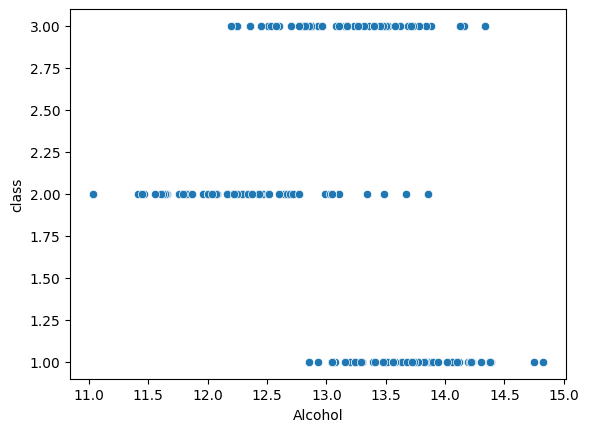

In [62]:
import seaborn as sns
sns.scatterplot(df, x='Alcohol', y='class')

<Axes: xlabel='class', ylabel='count'>

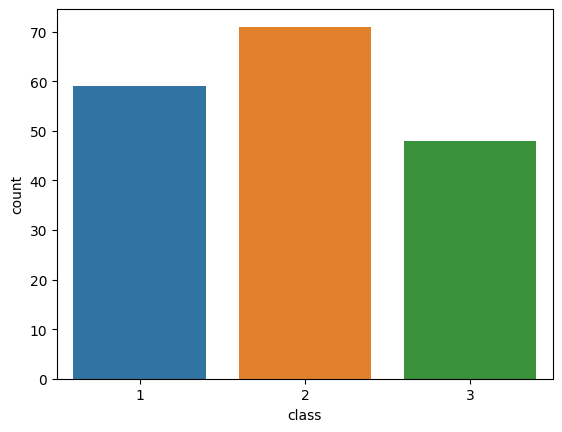

In [63]:
sns.countplot(x=df["class"])


<Axes: xlabel='Ash', ylabel='class'>

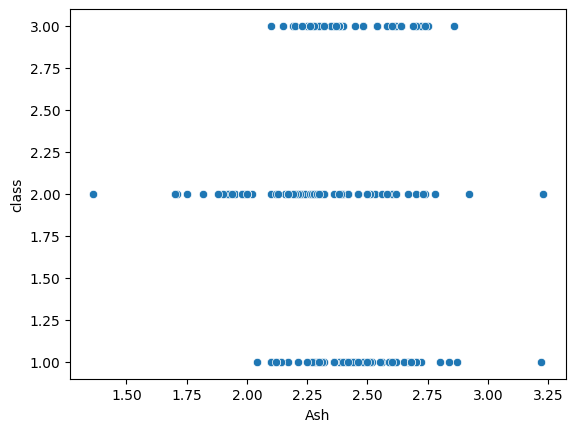

In [64]:
sns.scatterplot(df, x='Ash', y='class')

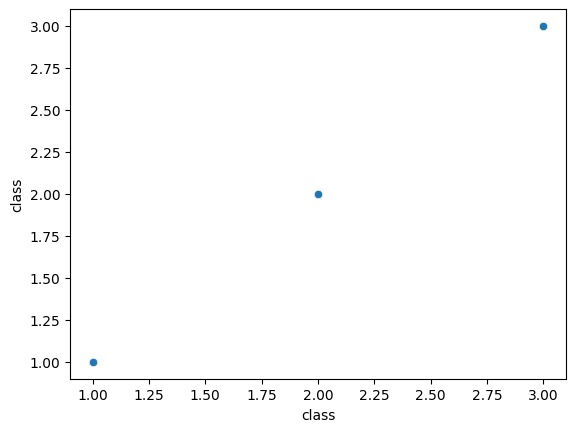

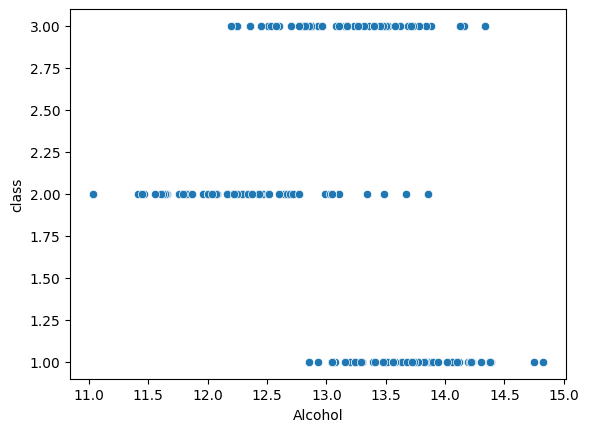

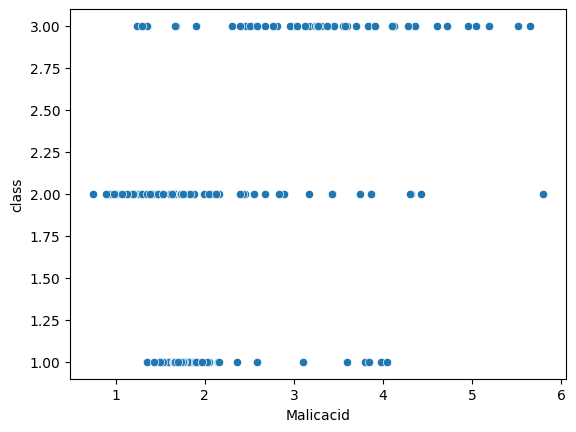

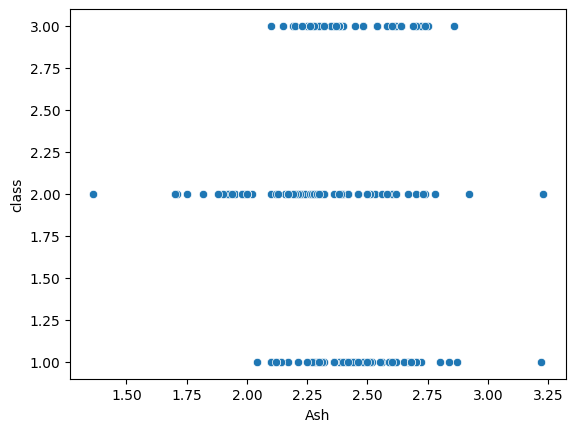

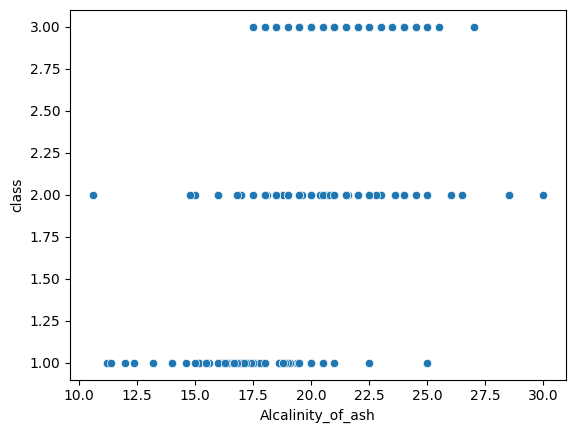

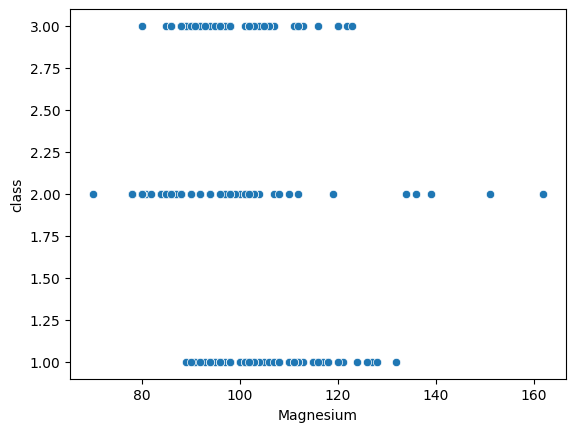

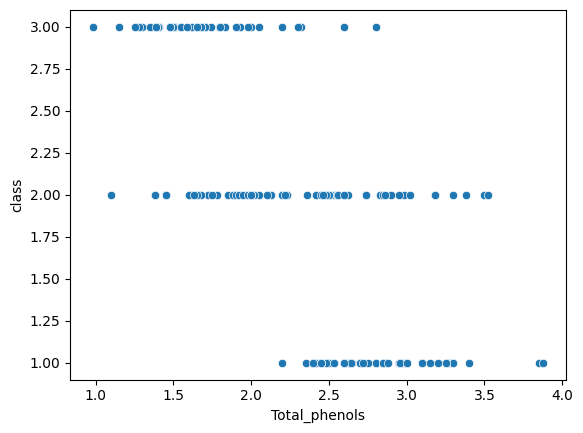

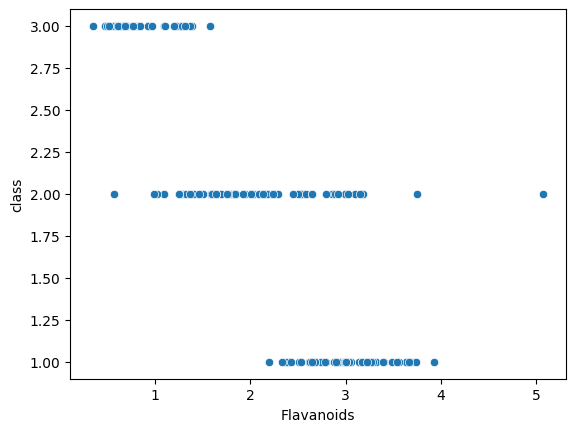

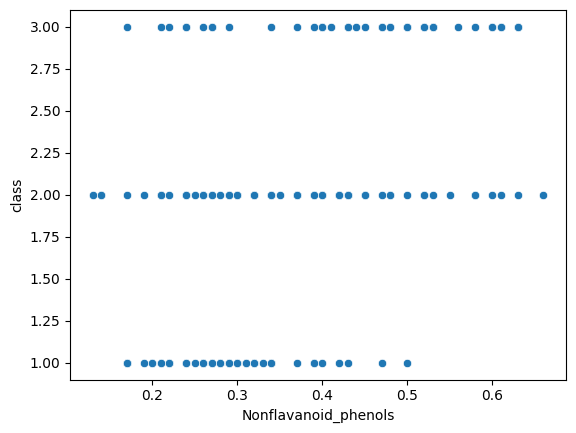

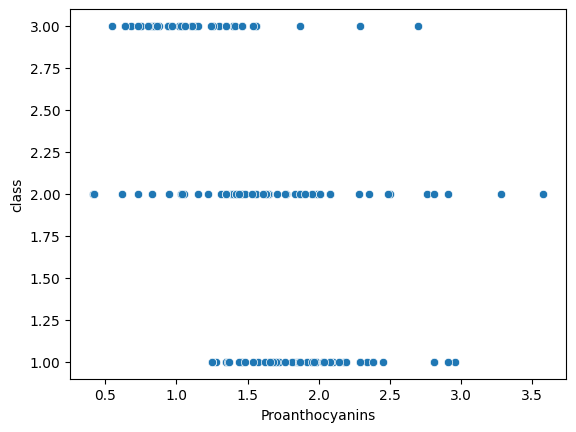

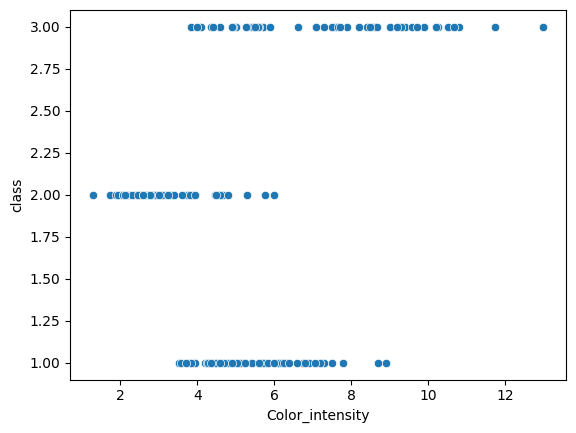

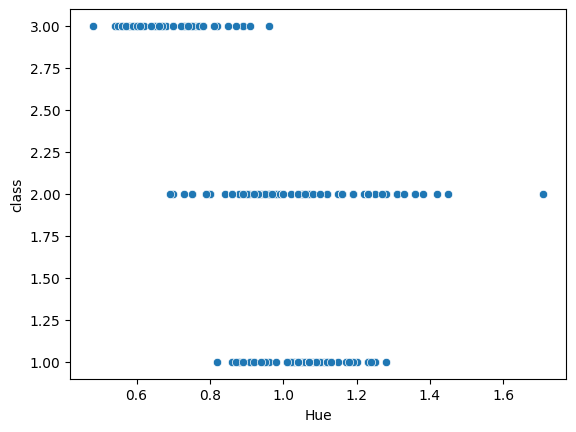

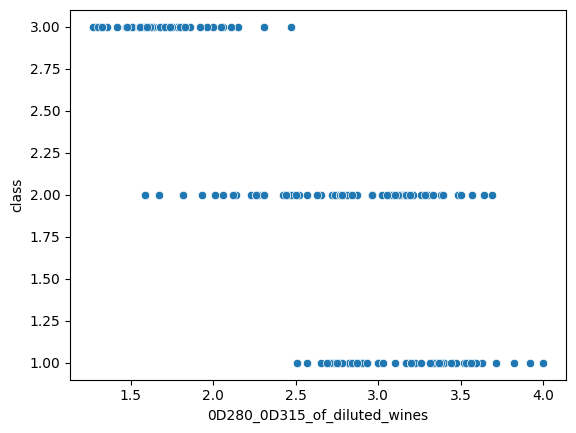

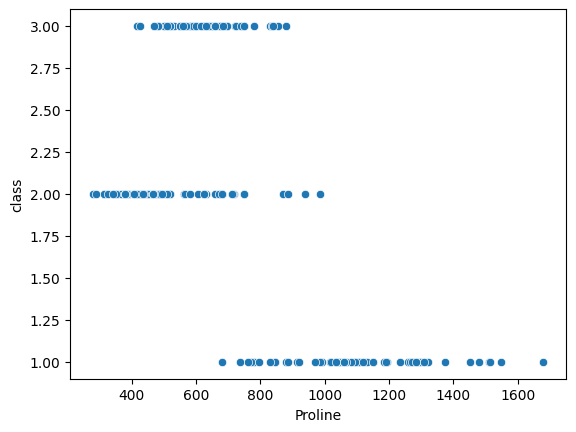

In [65]:
# plot multiple graphs vs labels
#add matplotlib to print multiple
import matplotlib.pyplot as plt
for name in column_names:
  plt.figure(name)
  sns.scatterplot(data=df,x=name,y='class')

## Extra -- remove outliers example

**Note** You can also remove features to prevent overfitting, among other things.

In [66]:
#refine the classes again
df2 = df.copy() #make a copy
df2['class'] = df2['class'].replace(3,0) #replace vineyrard 3 (C) with (A)
df2['class'] = df2['class'].replace(1,0)
df2['class'] = df2['class'].replace(2,1)

<Axes: xlabel='class', ylabel='count'>

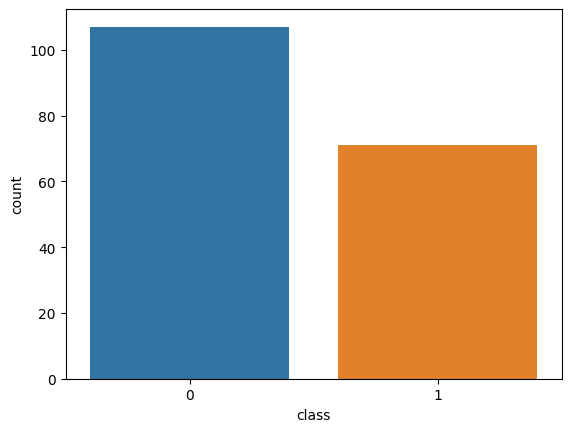

In [67]:
# plot the graph
sns.countplot(data=df2,x="class")

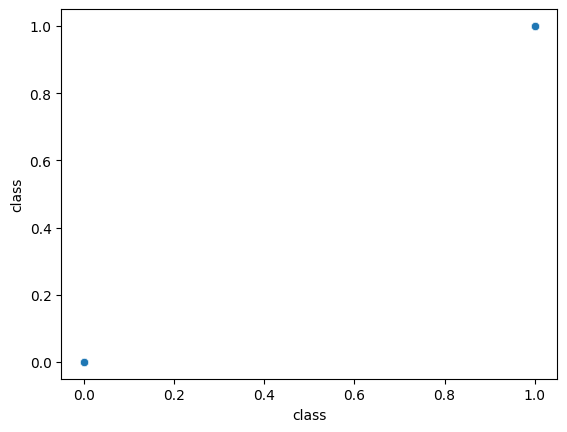

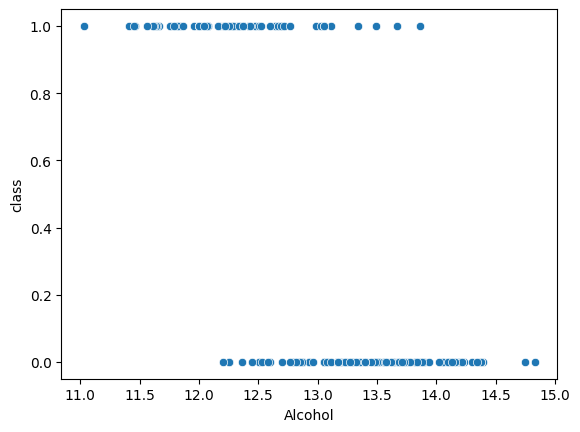

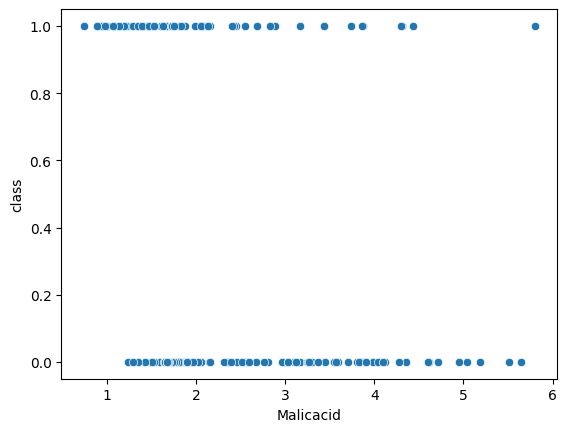

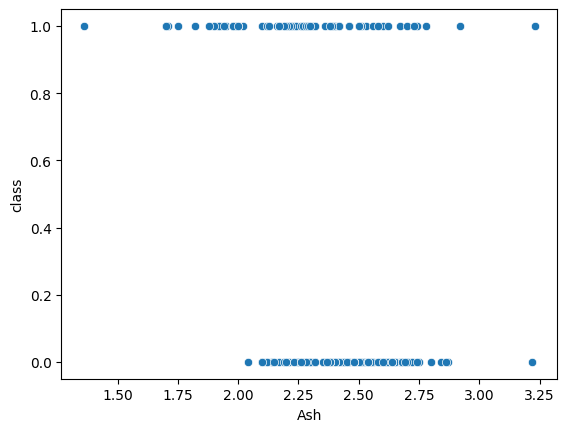

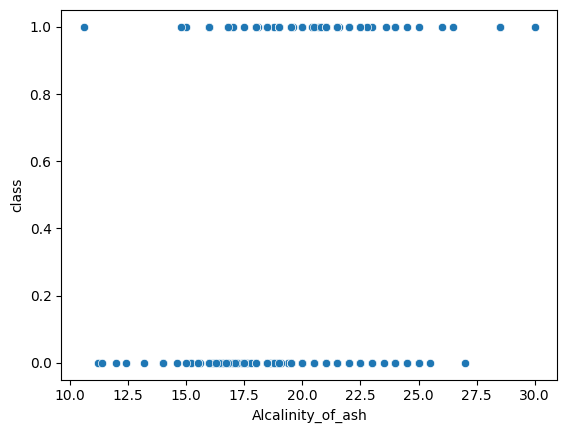

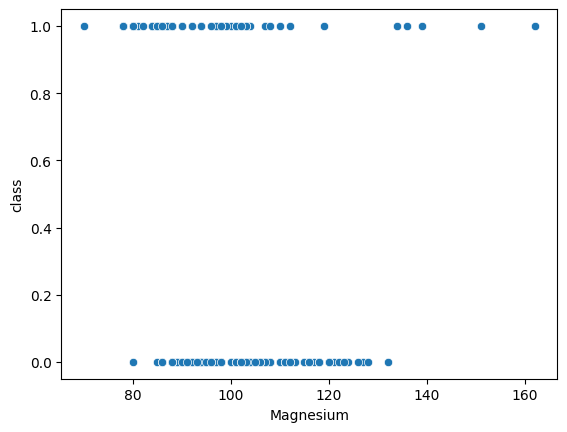

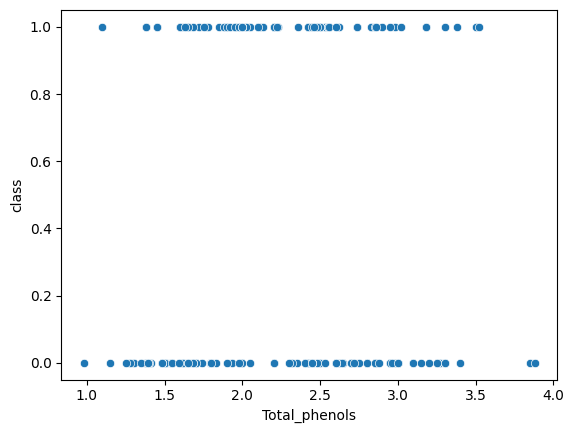

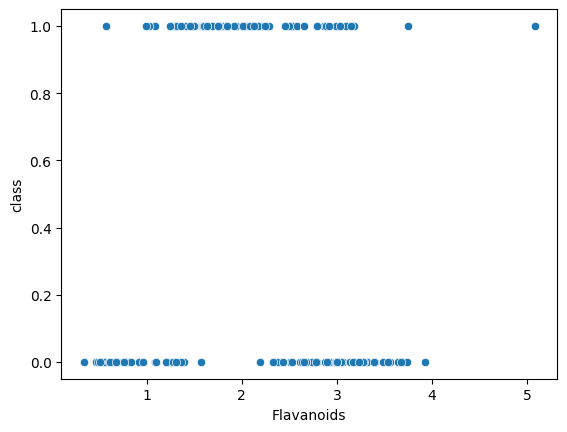

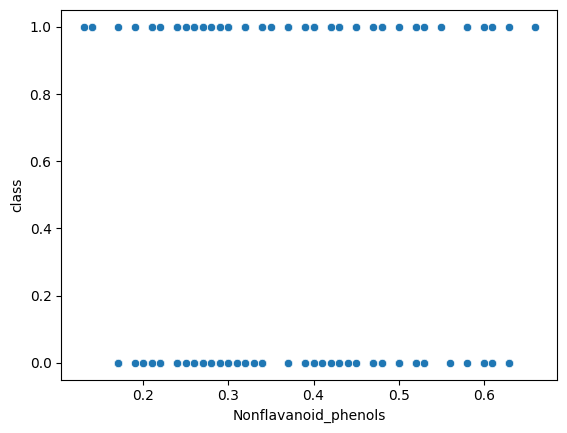

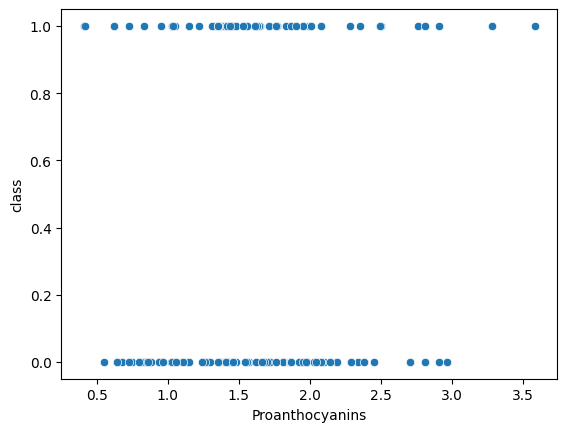

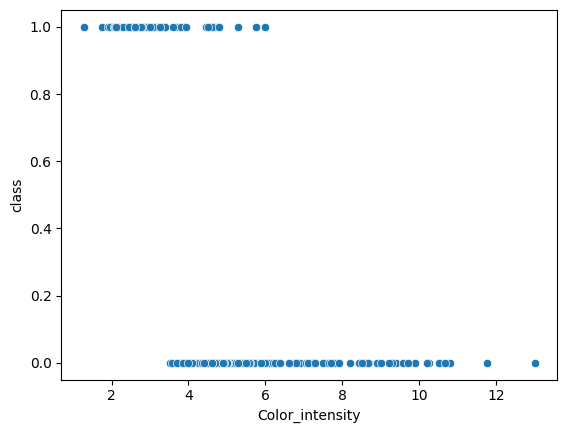

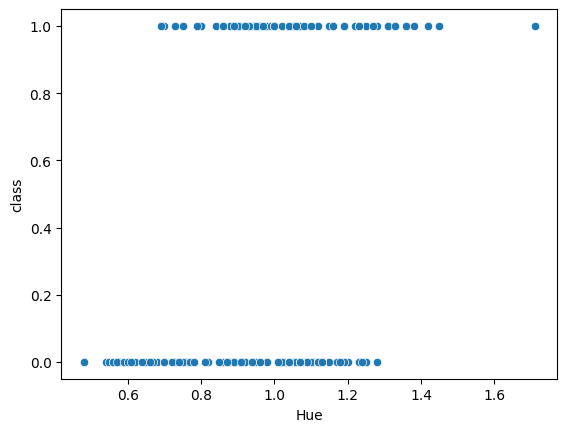

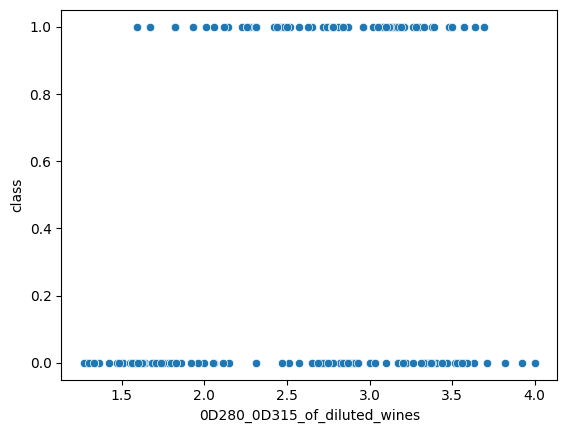

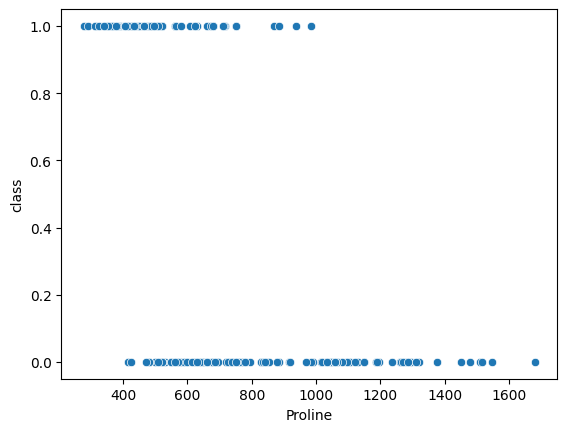

In [68]:
import matplotlib.pyplot as plt
for name in column_names:
  plt.figure(name)
  sns.scatterplot(df2,x=name,y='class')

In [69]:
# ash values (below) < 1.75

ash_less_175 = df2['Ash'] <1.75
df2[ash_less_175]


#alternative way of doing it
#df2[df2['Ash] < 1.75]


,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
59,1,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
66,1,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502
76,1,13.03,0.90,1.71,16.0,86,1.95,2.03,0.24,1.46,4.60,1.19,2.48,392
100,1,12.08,2.08,1.70,17.5,97,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710


In [70]:
#visulaising outliers more than three
df2[df2['Ash'] > 3]

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
25,0,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
121,1,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


In [71]:
index_to_drop = df2[df2['Ash'] < 1.75].index
df2 = df2.drop(index_to_drop)

<Axes: xlabel='Ash', ylabel='class'>

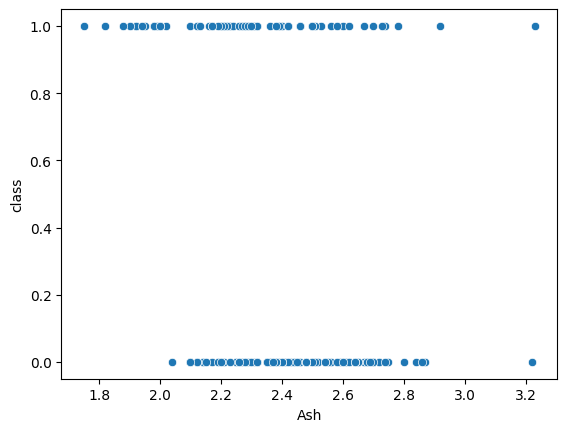

In [72]:
sns.scatterplot(data=df2,x="Ash",y='class')

In [73]:
index_to_drop_3 = df2[df2['Ash'] > 3].index
df2 = df2.drop(index_to_drop_3)

<Axes: xlabel='Ash', ylabel='class'>

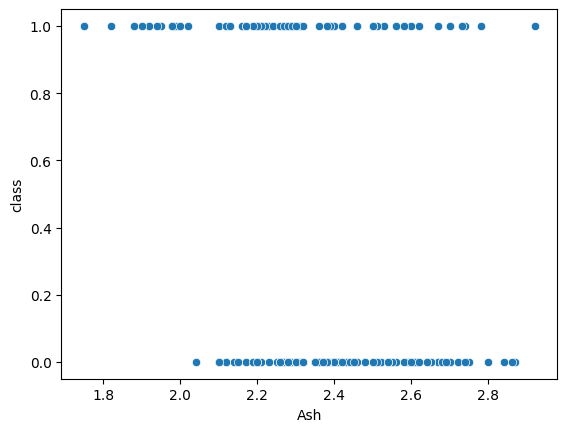

In [74]:
sns.scatterplot(data=df2,x="Ash",y='class')

## 3c: Check datatypes

In [75]:
# Check the data types
df2.dtypes

class                             int64
Alcohol                         float64
Malicacid                       float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
0D280_0D315_of_diluted_wines    float64
Proline                           int64
dtype: object

## 3d: Fix the label so it's a category

In [76]:
df2['class'] = df2['class'].astype('category')

In [77]:
df2.dtypes

class                           category
Alcohol                          float64
Malicacid                        float64
Ash                              float64
Alcalinity_of_ash                float64
Magnesium                          int64
Total_phenols                    float64
Flavanoids                       float64
Nonflavanoid_phenols             float64
Proanthocyanins                  float64
Color_intensity                  float64
Hue                              float64
0D280_0D315_of_diluted_wines     float64
Proline                            int64
dtype: object

## Step 4: Create training and test sets

### 4a: Separate the features and labels

In [78]:
# x is everthing expect for the class
y = df2['class']
X = df2.drop(columns='class')

from sklearn.model_selection import train_test_split

# instead of giving df2, giving x and y
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [79]:
y_train.unique()

[1, 0]
Categories (2, int64): [0, 1]

### 4b: Create training and test sets

## Step 5: Choose model

Covered in class so far:

* Logistic regression
* Decision trees

Other possibilites:

* AutoML
* Neural networks

### Step 5a: Decision Tree

Build and train model

In [80]:
# Decision Tree
from sklearn import tree
wine_tree = tree.DecisionTreeClassifier()
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier()

### Step 6a: Decision Tree

Check performance

In [107]:
#y_pred = wine_tree.predict(X_test)

y_pred = wine_tree.predict_proba(X_test)
y_pred = predict_proba_with_threshold(y_pred,0.4)


<ipython-input-56-c797f82ad73e>:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predicted_labels = (predicted_probabilities[:, 1] >= threshold).astype(np.int)


In [108]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1])

In [109]:
from sklearn.metrics import accuracy_score
#calculate accuracy score
accuracy_score(y_test, y_pred)

0.9142857142857143

In [110]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[21,  3],
       [ 0, 11]])

Text(0.5, 427.9555555555555, 'Predicted label')

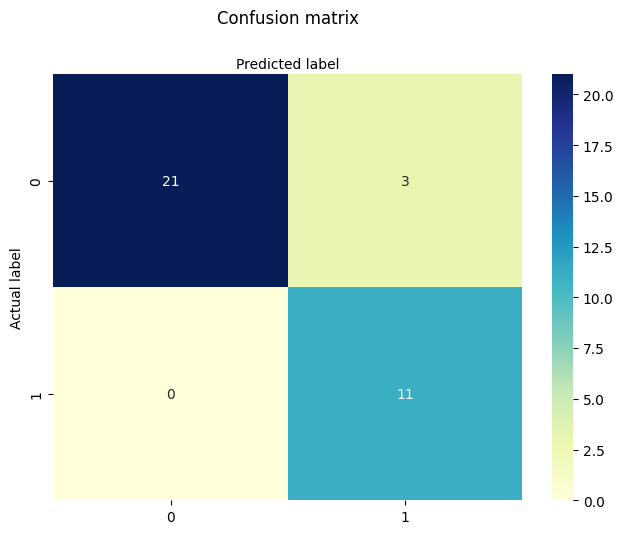

In [111]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Step 5b: Logistic Regression

Build and train model

In [116]:
# Decision Tree
from sklearn.linear_model import LogisticRegression
wine_log = LogisticRegression()
wine_log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [133]:
#y_pred_log = wine_log.predict(X_test)
y_pred_log = wine_log.predict_proba(X_test)
y_pred_log = predict_proba_with_threshold(y_pred_log,0.3)

from sklearn.metrics import accuracy_score
#calculate accuracy score
acc = accuracy_score(y_pred_log, y_test)
print(acc)

from sklearn import metrics
cnf_matrix_log = metrics.confusion_matrix(y_test, y_pred_log)
import numpy as np
cnf_matrix


0.8857142857142857


<ipython-input-56-c797f82ad73e>:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predicted_labels = (predicted_probabilities[:, 1] >= threshold).astype(np.int)


array([[21,  3],
       [ 0, 11]])

Text(0.5, 427.9555555555555, 'Predicted label')

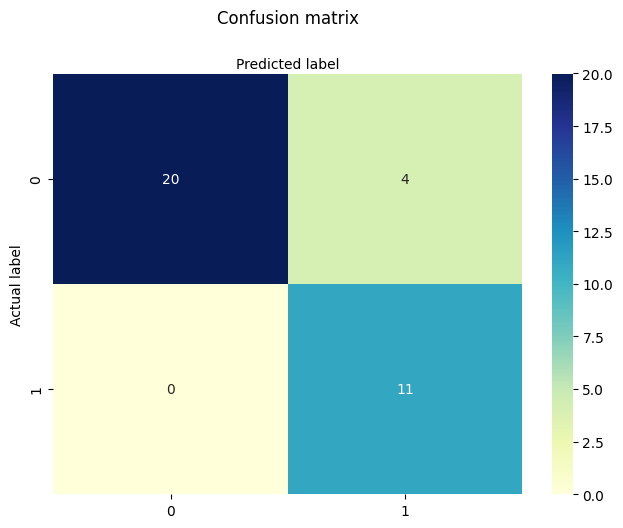

In [134]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Step 6b: Logistic Regression

Check performance

### Step 5c: AutoML

Build and train model

Taken from [Github - microsoft / FLAML](https://github.com/microsoft/FLAML)

In [89]:
# install
!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.6/295.6 kB 5.7 MB/s eta 0:00:00


In [90]:
from flaml import AutoML
automl = AutoML()
automl.fit(X_train, y_train, task="classification")

[flaml.automl.logger: 09-18 21:23:35] {1679} INFO - task = classification
[flaml.automl.logger: 09-18 21:23:35] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 09-18 21:23:35] {1788} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 09-18 21:23:35] {1811} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. Zero-shot AutoML is used for certain tasks and estimators. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.


INFO:flaml.default.suggest:metafeature distance: 0.07039039833256744
INFO:flaml.default.suggest:metafeature distance: 0.07039039833256744
INFO:flaml.default.suggest:metafeature distance: 0.07039039833256744
INFO:flaml.default.suggest:metafeature distance: 0.07039039833256744
INFO:flaml.default.suggest:metafeature distance: 0.06438022122160676
INFO:flaml.default.suggest:metafeature distance: 0.07039039833256744


[flaml.automl.logger: 09-18 21:23:35] {1900} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 09-18 21:23:35] {2218} INFO - iteration 0, current learner rf
[flaml.automl.logger: 09-18 21:23:39] {2344} INFO - Estimated sufficient time budget=10000s. Estimated necessary time budget=10s.
[flaml.automl.logger: 09-18 21:23:39] {2391} INFO -  at 3.3s,	estimator rf's best error=0.0011,	best estimator rf's best error=0.0011
[flaml.automl.logger: 09-18 21:23:39] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 09-18 21:23:39] {2391} INFO -  at 3.8s,	estimator lgbm's best error=0.0066,	best estimator rf's best error=0.0011
[flaml.automl.logger: 09-18 21:23:39] {2218} INFO - iteration 2, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-18 21:24:21] {2391} INFO -  at 45.6s,	estimator xgboost's best error=0.0066,	best estimator rf's best error=0.0011
[flaml.automl.logger: 09-18 21:24:21] {2218} INFO - iteration 3, current learner extra_tree
[flaml.automl.logger: 09-18 21:24:24] {2391} INFO -  at 48.3s,	estimator extra_tree's best error=0.0000,	best estimator extra_tree's best error=0.0000
[flaml.automl.logger: 09-18 21:24:24] {2218} INFO - iteration 4, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-18 21:24:25] {2391} INFO -  at 49.5s,	estimator xgb_limitdepth's best error=0.0110,	best estimator extra_tree's best error=0.0000
[flaml.automl.logger: 09-18 21:24:25] {2218} INFO - iteration 5, current learner lrl1


INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 09-18 21:24:25] {2391} INFO -  at 49.6s,	estimator lrl1's best error=0.1283,	best estimator extra_tree's best error=0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 09-18 21:24:25] {2627} INFO - retrain extra_tree for 0.5s
[flaml.automl.logger: 09-18 21:24:25] {2630} INFO - retrained model: ExtraTreesClassifier(criterion='entropy', max_features=0.3629795757973624,
                     max_leaf_nodes=81, n_estimators=408, n_jobs=-1,
                     random_state=12032022)
[flaml.automl.logger: 09-18 21:24:25] {1930} INFO - fit succeeded
[flaml.automl.logger: 09-18 21:24:25] {1931} INFO - Time taken to find the best model: 48.307907819747925


In [91]:
y_pred_automl = automl.predict(X_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred_automl, y_test)
print(acc)

from sklearn.metrics import confusion_matrix
import numpy as np
cnf_matrix_automl = confusion_matrix(y_test, y_pred_automl)

1.0


### Step 6c: AutoML

Check performance

Text(0.5, 427.9555555555555, 'Predicted label')

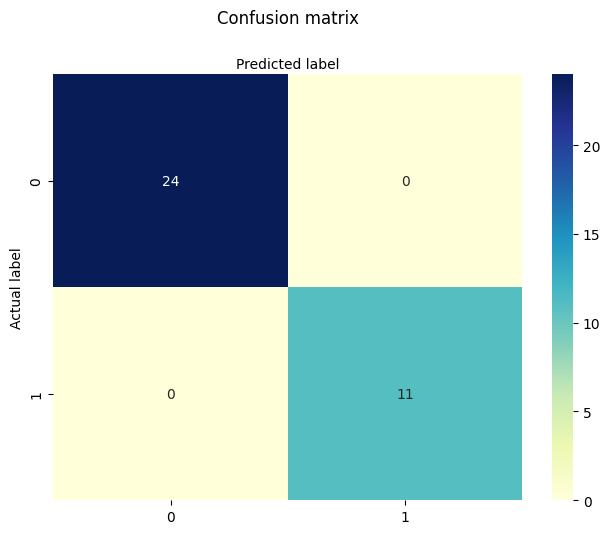

In [92]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_automl), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [93]:
automl.best_config

{'n_estimators': 408,
 'max_features': 0.3629795757973624,
 'max_leaves': 81,
 'criterion': 'entropy'}

In [94]:
output = (zip(X.columns,automl.feature_importances_))


  ## X columns comes in from when I split the data up

In [95]:
sorted(output, key=lambda x:[1], reverse=True)

[('Alcohol', 0.19673635907470632),
 ('Malicacid', 0.0482417491075446),
 ('Ash', 0.026022363974086405),
 ('Alcalinity_of_ash', 0.030064099671975573),
 ('Magnesium', 0.05001950752803374),
 ('Total_phenols', 0.02334554601837467),
 ('Flavanoids', 0.08649679129108742),
 ('Nonflavanoid_phenols', 0.017836429759904637),
 ('Proanthocyanins', 0.02941493457351598),
 ('Color_intensity', 0.22241037140321004),
 ('Hue', 0.05524100331852244),
 ('0D280_0D315_of_diluted_wines', 0.054864314640315215),
 ('Proline', 0.15930652963872302)]

# Improve the model performance

Adjust the following cells to improve performance.

Parameters to adjust can be found in the documentation. It's also best to ask a supervisor for the best practices for how they would go about tuning a model - write out a list of steps to try and document your performance results.

## Decision Trees

Try max nodes max_leaf_nodes
Documentation link: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Logistic Regression

Adjust max_iter
Documentation link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## AutoML

There's not much you can do. You can play around with selecting different types of models from the documentation in the readme.
Documentation link: https://github.com/microsoft/FLAML

# Decision Tree

# Logistic Regression

# AutoML